In [6]:
import numpy as np
import matplotlib.pyplot as plt

# y' + 2y = 0
# y' = -2y = f(t,y)
# exp(-2y)

def EulerExplicit(y0, t0, tf, h, f):

    n = int((tf-t0)/h)
    rng = np.linspace(t0, tf, n+1)
    y_values = np.zeros(n + 1)
    y_values[0] = y0
    
    for i in range(n):
        y_values[i+1] = y_values[i] + (h * f(rng[i], y_values[i]))
    
    return rng, y_values

def RK2(y0, t0, tf, h, f):

    n = int((tf-t0)/h)
    rng = np.linspace(t0, tf, n+1)
    y_values = np.zeros(n + 1)
    y_values[0] = y0
    
    for i in range(n):
        k1 = h * f(rng[i], y_values[i])
        k2 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k1))
        y_values[i+1] = y_values[i] + k2
        
    return rng, y_values

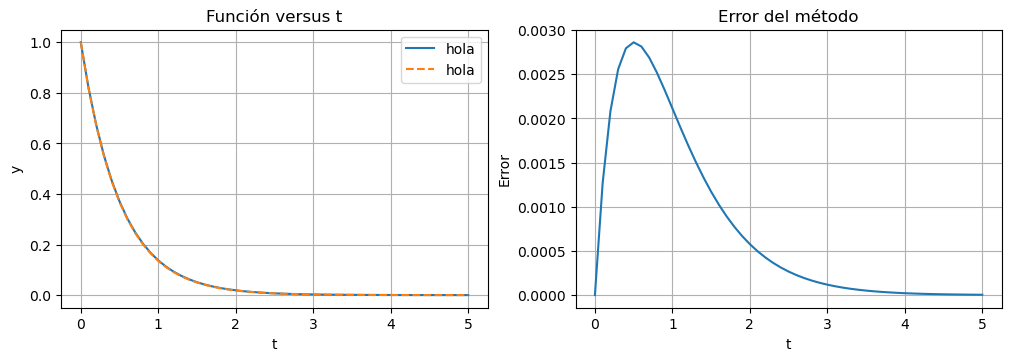

In [14]:
f = lambda t,y: -2*y
y_expected = lambda y: np.exp(-2*y)
t0 = 0
tf = 5
y0 = 1
h = 1e-1

t, y_values = RK2(1, t0, tf, h, f)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t, y_values)
ax[0].plot(t, y_expected(t), ls = "--")
ax[0].set_title("Función versus t")
ax[0].set_xlabel("t")
ax[0].set_ylabel("y")

error = np.abs(y_expected(t) - y_values)

ax[1].plot(t, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[0].grid()
ax[0].legend(["hola", "hola"])
ax[1].grid()
plt.show()
